# Task 6: K-Nearest Neighbors (KNN) Classification

## 1.Choose a classification dataset and normalize features.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

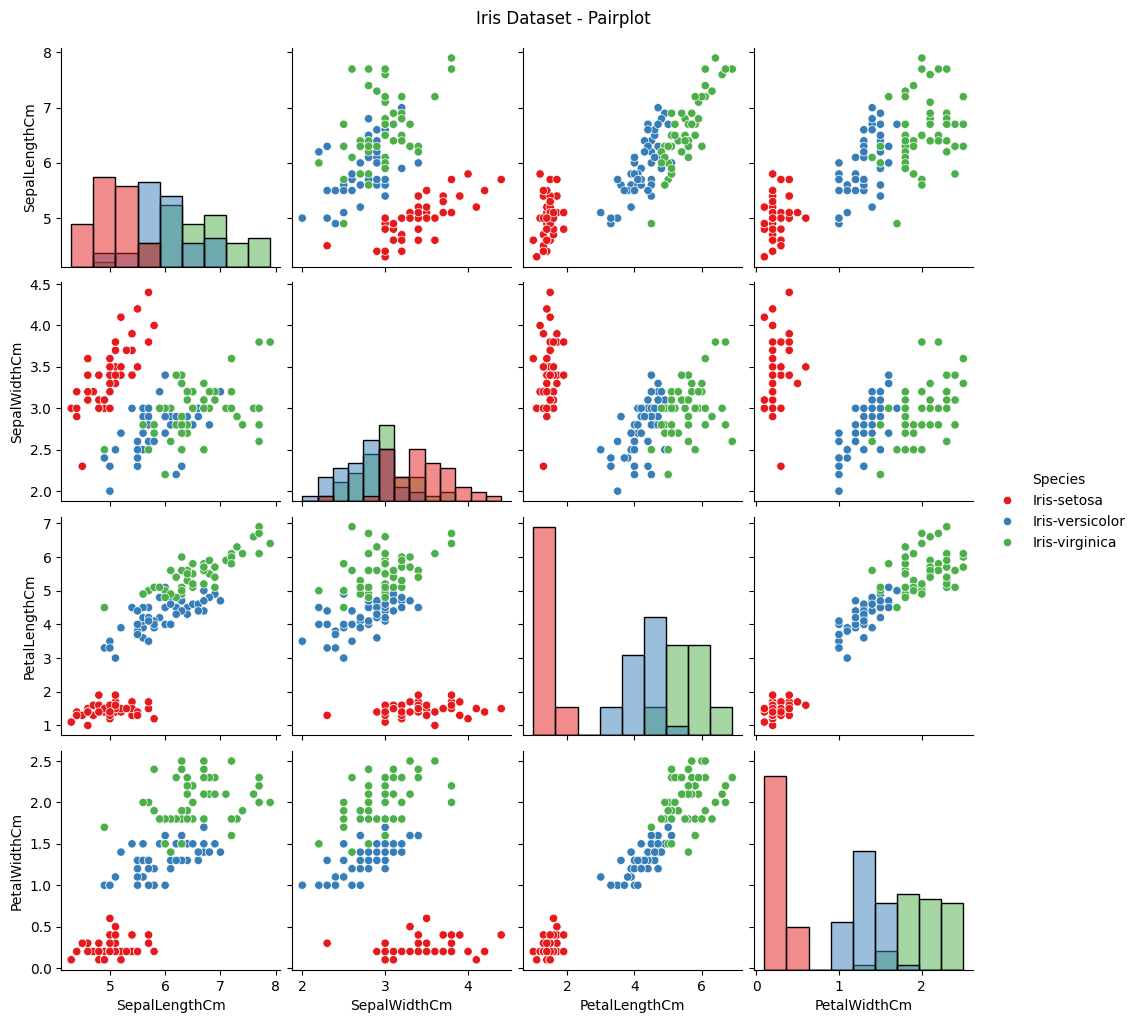

In [8]:
sns.pairplot(df, hue="Species", diag_kind="hist", palette="Set1")
plt.suptitle("Iris Dataset - Pairplot", y=1.02)
plt.show()

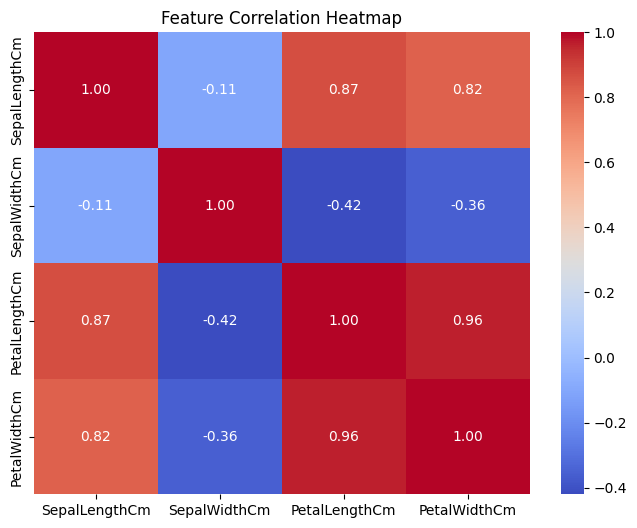

In [9]:
plt.figure(figsize=(8,6))
corr = df.drop(columns=["Species"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\SANJAY PATIL M\AppData\Local\Temp\ipykernel_18808\1904346690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=col, data=df, palette="Set2")
C:\Users\SANJAY PATIL M\AppData\Local\Temp\ipykernel_18808\1904346690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=col, data=df, palette="Set2")
C:\Users\SANJAY PATIL M\AppData\Local\Temp\ipykernel_18808\1904346690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=col, data=df, palette="Set2")
C:\Users\SANJAY PATIL M\AppData\Local\Temp\ipy

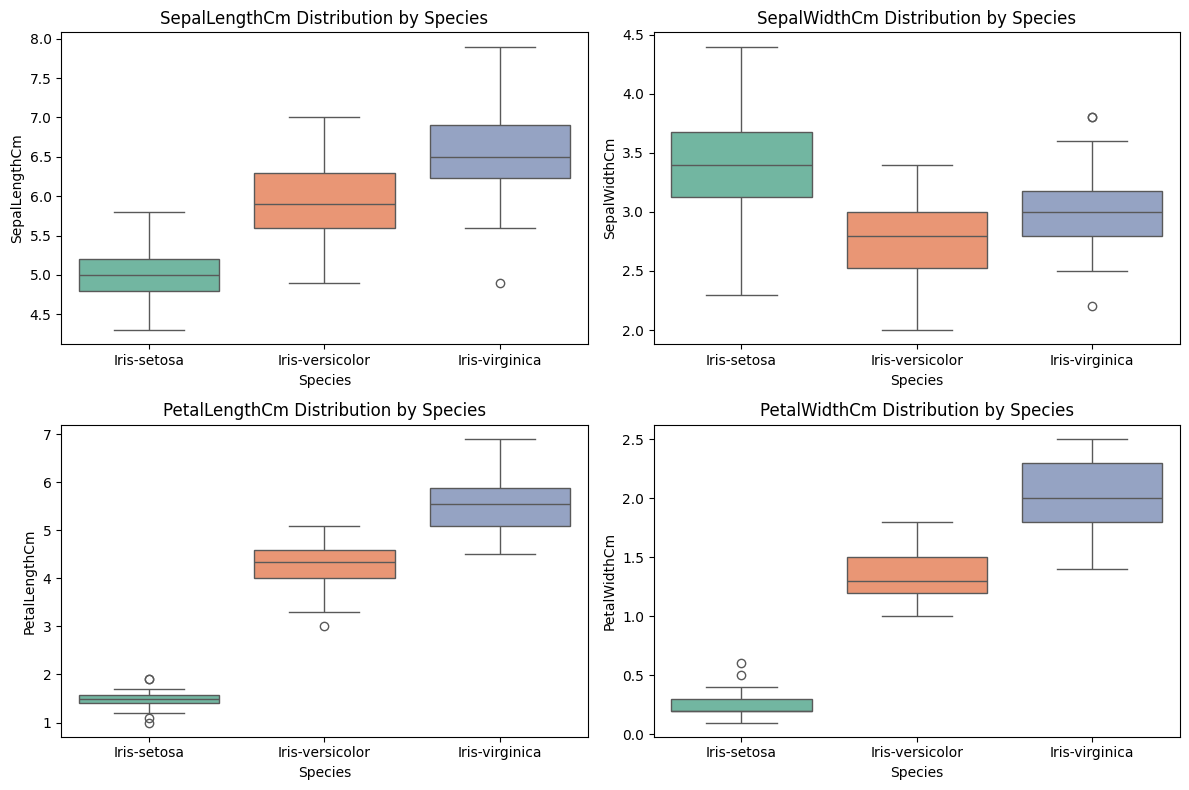

In [10]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Species", y=col, data=df, palette="Set2")
    plt.title(f"{col} Distribution by Species")
plt.tight_layout()
plt.show()

In [12]:
# Normalize features
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Species'])
y = df['Species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  2.Use KNeighborsClassifier from sklearn.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("X_train:",X_train.shape," X_test:",X_test.shape)
print("y_train:",y_train.shape," y_test:",y_test.shape)

X_train: (120, 4)  X_test: (30, 4)
y_train: (120,)  y_test: (30,)


##  3.Experiment with different values of K.

In [37]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K = {k} → Accuracy = {accuracy_score(y_test, y_pred):.3f}")

K = 1 → Accuracy = 0.967
K = 3 → Accuracy = 1.000
K = 5 → Accuracy = 1.000
K = 7 → Accuracy = 1.000
K = 9 → Accuracy = 1.000


In [36]:
best_k = 5
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

##  4.Evaluate model using accuracy, confusion matrix.

In [24]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



##  5.Visualize decision boundaries.

In [25]:
Visualize decision boundaries (first two features only)
X_plot = X_scaled[:, :2]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y, test_size=0.2, random_state=42
)

knn_plot = KNeighborsClassifier(n_neighbors=best_k)
knn_plot.fit(X_train_plot, y_train_plot)

KNeighborsClassifier()

In [34]:
# Meshgrid for decision boundaries
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Series(Z).astype('category').cat.codes.values  # Convert to integers
Z = Z.reshape(xx.shape)

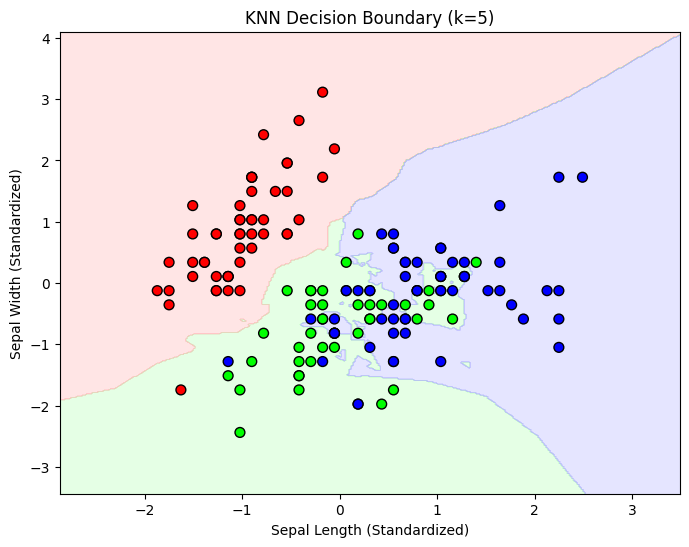

In [35]:
# Plot decision boundaries
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}),
            cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (k={best_k})")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.show()